📊 **Ustunlar tavsifi (Gold qatlam)**

🕒 **Vaqt va geografiya**

**year (int32)**
Kuzatuvning kalendar yili.

**region (object)**
Oʻzbekistonning maʼmuriy hududi (masalan, Andijon, Toshkent, Samarqand).

💰 **Daromad va iqtisodiyot**

**income_pc (float64)**
Hududda aholi jon boshiga oʻrtacha daromad.

**grp (float64)**
Yalpi hududiy mahsulot (YHM) — hududda ishlab chiqarilgan umumiy iqtisodiy mahsulot hajmi.

**inv_fixed_capital_pc (float64)**
Aholi jon boshiga asosiy kapitalga kiritilgan investitsiyalar.

👷 **Mehnat bozori**

**labor_resources_thousand (float64)**
Hududdagi jami mehnat resurslari (ming kishi).

**econ_active_thousand (float64)**
Iqtisodiy faol aholi (band + ishsiz), ming kishi.

**econ_inactive_thousand (float64)**
Iqtisodiy nofaol aholi, ming kishi.

**employed_thousand (float64)**
Band aholi soni, ming kishi.

**unemployed_thousand (float64)**
Ishsizlar soni, ming kishi.

**employement_rate_pct (float64)**
Mehnatga layoqatli aholi orasida bandlik darajasi, foizda.

🏗️ **Ishlab chiqarish va savdo**

**construction (float64)**
Hududdagi umumiy qurilish ishlari hajmi.

**foreign_trade_turnover (float64)**
Tashqi savdo aylanmasi (import va eksportning jami qiymati).

**wholesale_trade (float64)**
Ulgurji savdo aylanmasi.

**retail_trade (float64)**
Chakana savdo aylanmasi.

**agriculture_output (float64)**
Qishloq xoʻjaligi mahsulotlarining umumiy ishlab chiqarish hajmi.

👥 **Demografiya**

**population_permanent (float64)**
Hududning doimiy aholisi soni.

**births_total (int64)**
Roʻyxatga olingan tugʻilishlar jami soni.

**births_girls (int64)**
Qiz bolalar tugʻilishlari soni.

**births_boys (int64)**
Oʻgʻil bolalar tugʻilishlari soni.

**fact_deaths (int64)**
Roʻyxatga olingan vafot etganlar soni.

🌍 **Atrof-muhit**

**air_pollutants_emitted(1000_t) (float64)**
Atmosferaga chiqarilgan ifloslantiruvchi moddalar hajmi (ming tonna).

🏢 **Biznes faolligi**

**active_enterprises_count (int64)**
Hududda faoliyat yuritayotgan roʻyxatdan oʻtgan korxonalar soni.


Birinchi navbatda pandas kutubxonasini va boshqa faylda tayyorlab qo'ygan cleaner faylidagi class'ni yuklab olamiz. va bizning excel faylimiz manzilini path'ga tenglab qo'yamiz

In [1]:
import pandas as pd
from final.cleaner import DataCleaner
cleaner=DataCleaner()
path = "C:/Users/Asus/PycharmProjects/JupyterProject1/final/final.xlsx"

Endi bronze layer shunchaki raw data'ga teng bo'lgani uchun shutil kutubxonasi orqali faylni avvaldan tayyorlab qo'yilgan data_lake papkasiga joylaymiz.

In [2]:
import shutil
shutil.copy(
    path,
    "C:/Users/Asus/PycharmProjects/JupyterProject1/final/data_lake/bronze_layer.xlsx"
)

'C:/Users/Asus/PycharmProjects/JupyterProject1/final/data_lake/bronze_layer.xlsx'

**Silver layer**.

Endi esa bizga berilgan excel fayl'da bizga kerak bo'lgan ko'rsatkichlar alohida sheet'larda joylashgani uchun bitta faylga merge qilib olamiz, region_year_id primary key orqali. Bu fayl bizga ma'lumotlarni qabul qilish bo'limidan (OLTP) kelayotgani uchun shunday saqlangan.

In [3]:
xls = pd.ExcelFile(path)

In [4]:
merged_df = None

for sheet in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet)

    if "region_year_id" not in df.columns:
        continue

    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(
            df,
            on="region_year_id",
            how="left",
            suffixes=("", f"_{sheet}")
        )

In [5]:
silver_df = merged_df
silver_df

region_year_id  income_pc  labor_resources_thousand  \
0    Ozbekiston2010     2.1928                   16726.0   
1    Ozbekiston2011     2.9289                   17286.4   
2    Ozbekiston2012     3.5018                   17564.3   
3    Ozbekiston2013     4.1751                   17814.1   
4    Ozbekiston2014     4.7596                   18048.0   
..              ...        ...                       ...   
220  Toshkentsh2020    26.3349                    1750.5   
221  Toshkentsh2021    31.5020                    1877.5   
222  Toshkentsh2022    38.1436                    1945.6   
223  Toshkentsh2023    47.1834                    1991.2   
224  Toshkentsh2024    60.5944                    2068.5   

     econ_active_thousand  econ_inactive_thousand  employed_thousand  \
0                 12286.6                  4439.4            11628.4   
1                 12541.5                  4744.9            11919.1   
2                 12850.1                  4714.2            12223.8   
3                 13163.0                  4651.1            12523.3   
4                 13505.4                  4542.6            12818.4   
..                    ...                     ...                ...   
220                1352.3                   398.2             1243.5   
221                1416.1                   461.4             1317.2   
222                1466.4                   479.2             1371.1   
223                1476.4                   514.8             1396.8   
224                1491.4                   577.1             1424.7   

     employement_rate_pct  unemployed_thousand          grp  \
0                    66.9                658.2   88102400.0   
1                    66.2                622.4  115627800.0   
2                    66.6                626.3  142333000.0   
3                    67.1                639.7  173201500.0   
4                    67.7                687.0  210998300.0   
..                    ...                  ...          ...   
220                  81.7                108.8  111465300.0   
221                  81.3                 98.9  144477100.0   
222                  82.5                 95.3  178973300.0   
223                  82.3                 79.6  222926100.0   
224                  82.3                 66.7  302878500.0   

     inv_fixed_capital_pc  ...  wholesale_trade  retail_trade  \
0                  2.1928  ...       11774100.0    21872800.0   
1                  2.9289  ...       15476700.0    28539000.0   
2                  3.5018  ...       18018800.0    36946400.0   
3                  4.1751  ...       22001677.0    46863000.0   
4                  4.7596  ...       25512624.0    58136600.0   
..                    ...  ...              ...           ...   
220               26.3349  ...       69991602.6    46111600.0   
221               31.5020  ...      107851250.5    52954500.0   
222               38.1436  ...      142354083.9    66784000.0   
223               47.1834  ...      210467312.4    85449900.0   
224               60.5944  ...      245754010.1   108188000.0   

     population_permanent  air_pollutants_emitted(1000 t)  agriculture_output  \
0                 28001.4                           729.0          30856700.0   
1                 29123.4                           788.2          45285900.0   
2                 29555.4                           817.6          55750000.0   
3                 29993.5                           855.2          66435300.0   
4                 30492.8                          1162.1          81794300.0   
..                    ...                             ...                 ...   
220               46111.6                        111465.3                 0.0   
221               52954.5                        144477.1                 0.0   
222               66784.0                        178973.3                 0.0   
223               85449.9                        222926.1              

Bizga kerak bo'lmagan ba'zi kerak bo'lmagan column'larni drop qilib yuboramiz.

In [6]:
drop_cols = [
    "employement_rate_pct",
    "econ_inactive_thousand",
    "births_girls",
    "births_boys",
    "air_pollutants_emitted(1000_t)"
]
silver_df = silver_df.drop(columns=[c for c in drop_cols if c in silver_df.columns])


Keyingi bosqichda boshqa faylda yaratib olgan cleaner funksiyamiz orqali dataset'ni tozalab olamiz

In [7]:
silver_df= cleaner.clean(silver_df)
silver_df

region_year_id  income_pc  labor_resources_thousand  \
0    Ozbekiston2010     2.1928                   16726.0   
1    Ozbekiston2011     2.9289                   17286.4   
2    Ozbekiston2012     3.5018                   17564.3   
3    Ozbekiston2013     4.1751                   17814.1   
4    Ozbekiston2014     4.7596                   18048.0   
..              ...        ...                       ...   
220  Toshkentsh2020    26.3349                    1750.5   
221  Toshkentsh2021    31.5020                    1877.5   
222  Toshkentsh2022    38.1436                    1945.6   
223  Toshkentsh2023    47.1834                    1991.2   
224  Toshkentsh2024    60.5944                    2068.5   

     econ_active_thousand  employed_thousand  unemployed_thousand  \
0                 12286.6            11628.4                658.2   
1                 12541.5            11919.1                622.4   
2                 12850.1            12223.8                626.3   
3                 13163.0            12523.3                639.7   
4                 13505.4            12818.4                687.0   
..                    ...                ...                  ...   
220                1352.3             1243.5                108.8   
221                1416.1             1317.2                 98.9   
222                1466.4             1371.1                 95.3   
223                1476.4             1396.8                 79.6   
224                1491.4             1424.7                 66.7   

             grp  inv_fixed_capital_pc  construction  foreign_trade_turnover  \
0     88102400.0                2.1928     8245800.0            2.683033e+08   
1    115627800.0                2.9289     9504800.0            3.186627e+08   
2    142333000.0                3.5018    11753900.0            3.192695e+08   
3    173201500.0                4.1751    15219300.0            3.416712e+08   
4    210998300.0                4.7596    20060400.0            3.327335e+08   
..           ...                   ...           ...                     ...   
220  111465300.0               26.3349    19215400.0            1.493863e+08   
221  144477100.0               31.5020    26535400.0            2.004262e+08   
222  178973300.0               38.1436    32946300.0            2.369977e+08   
223  222926100.0               47.1834    54310900.0            3.044059e+08   
224  302878500.0               60.5944    69012300.0            3.206243e+08   

     wholesale_trade  retail_trade  population_permanent  \
0         11774100.0    21872800.0               28001.4   
1         15476700.0    28539000.0               29123.4   
2         18018800.0    36946400.0               29555.4   
3         22001677.0    46863000.0               29993.5   
4         25512624.0    58136600.0               30492.8   
..               ...           ...                   ...   
220       69991602.6    46111600.0               46111.6   
221      107851250.5    52954500.0               52954.5   
222      142354083.9    66784000.0               66784.0   
223      210467312.4    85449900.0               85449.9   
224      245754010.1   108188000.0              108188.0   

     air_pollutants_emitted(1000_t)  agriculture_output  fact_deaths  \
0                             729.0          30856700.0       138411   
1                             788.2          45285900.0       143253   
2                             817.6          55750000.0       145988   
3                             855.2          66435300.0       145672   
4                            1162.1          81794300.0       149761   
..                              ...                 ...          ...   
220                        111465.3                 0.0        21199   
221                        144477.1                 0.0        18892   
222                        178973.3                 0.0        16471   
223                        222926.1                 0

Endi esa bizga python'da analitika qilishimiz uchun year_region_id column'ni region va year column'lariga bo'lib tashlaymiz chunki merge qilib bo'ldik va bu ustunlar orqali group_by yoki shunga o'xshash aggregatsiyalar qilishimiz mumkin bo'ladi

In [8]:
silver_df= cleaner.column_split(silver_df)
"""year va region ustunlarini birinchiga olib chiqib qo'yamiz"""
silver_df = silver_df[["year", "region"] + silver_df.columns.drop(["year", "region"]).tolist()]

In [9]:
silver_df.dtypes

year                                 int32
region                            category
income_pc                          float64
labor_resources_thousand           float64
econ_active_thousand               float64
employed_thousand                  float64
unemployed_thousand                float64
grp                                float64
inv_fixed_capital_pc               float64
construction                       float64
foreign_trade_turnover             float64
wholesale_trade                    float64
retail_trade                       float64
population_permanent               float64
air_pollutants_emitted(1000_t)     float64
agriculture_output                 float64
fact_deaths                          int64
births_total                         int64
active_enterprises_count             int64
dtype: object

In [10]:
silver_df["grp_pc"] = silver_df["grp"]/silver_df["population_permanent"]

Ba'zi qo'shimcha ustunlar qo'shib olgandan keyin silver layer'ni saqlab qo'yamiz

In [11]:
silver_df.to_excel(
    "data_lake/silver_layer.xlsx",
    index=False
)

Endi tahlilimizni izchil qilish va ikki marta hisoblab yuborishning oldini olish uchun milliy va hududiy ko‘rsatkichlarni alohida ajratishimiz kerak.

In [12]:
national_df = silver_df[
    silver_df["region"].str.lower().isin(
        ["ozbekiston"]
    )
].copy()
regional_df = silver_df.drop(national_df.index).copy()

In [13]:
national_df.head()

year      region  income_pc  labor_resources_thousand  \
0  2010  Ozbekiston     2.1928                   16726.0   
1  2011  Ozbekiston     2.9289                   17286.4   
2  2012  Ozbekiston     3.5018                   17564.3   
3  2013  Ozbekiston     4.1751                   17814.1   
4  2014  Ozbekiston     4.7596                   18048.0   

   econ_active_thousand  employed_thousand  unemployed_thousand          grp  \
0               12286.6            11628.4                658.2   88102400.0   
1               12541.5            11919.1                622.4  115627800.0   
2               12850.1            12223.8                626.3  142333000.0   
3               13163.0            12523.3                639.7  173201500.0   
4               13505.4            12818.4                687.0  210998300.0   

   inv_fixed_capital_pc  construction  foreign_trade_turnover  \
0                2.1928     8245800.0            2.683033e+08   
1                2.9289     9504800.0            3.186627e+08   
2                3.5018    11753900.0            3.192695e+08   
3                4.1751    15219300.0            3.416712e+08   
4                4.7596    20060400.0            3.327335e+08   

   wholesale_trade  retail_trade  population_permanent  \
0       11774100.0    21872800.0               28001.4   
1       15476700.0    28539000.0               29123.4   
2       18018800.0    36946400.0               29555.4   
3       22001677.0    46863000.0               29993.5   
4       25512624.0    58136600.0               30492.8   

   air_pollutants_emitted(1000_t)  agriculture_output  fact_deaths  \
0                           729.0          30856700.0       138411   
1                           788.2          45285900.0       143253   
2                           817.6          55750000.0       145988   
3                           855.2          66435300.0       145672   
4                          1162.1          81794300.0       149761   

   births_total  active_enterprises_count       grp_pc  
0        634810                    200951  3146.356968  
1        622835                    214084  3970.271328  
2        625106                    228736  4815.803542  
3        679519                    229177  5774.634504  
4        718036                    241201  6919.610531

In [14]:
regional_df.head()

year           region  income_pc  labor_resources_thousand  \
15  2010  Qoraqalpogiston     1.4989                     945.5   
16  2011  Qoraqalpogiston     1.9722                     973.8   
17  2012  Qoraqalpogiston     2.4144                     983.5   
18  2013  Qoraqalpogiston     2.8566                     996.6   
19  2014  Qoraqalpogiston     3.3171                    1011.9   

    econ_active_thousand  employed_thousand  unemployed_thousand        grp  \
15                 627.4              580.8                 46.6  2604200.0   
16                 631.7              590.0                 41.7  3385300.0   
17                 641.5              600.2                 41.3  4236200.0   
18                 650.8              610.5                 40.3  5519400.0   
19                 656.7              621.0                 35.7  6887200.0   

    inv_fixed_capital_pc  construction  foreign_trade_turnover  \
15                1.4989      237100.0            1.526483e+06   
16                1.9722      398600.0            1.913241e+06   
17                2.4144      537200.0            2.904307e+06   
18                2.8566      720800.0            2.825746e+06   
19                3.3171     1053500.0            3.830107e+06   

    wholesale_trade  retail_trade  population_permanent  \
15         292400.0      711300.0                 711.3   
16         446300.0      897300.0                 897.3   
17         474600.0     1155200.0                1155.2   
18         463035.0     1568300.0                1568.3   
19         562131.2     1977800.0                1977.8   

    air_pollutants_emitted(1000_t)  agriculture_output  fact_deaths  \
15                          2604.2            990400.0         8342   
16                          3385.3           1282100.0         8184   
17                          4236.2           1812200.0         8208   
18                          5519.4           2071400.0         8134   
19                          6887.2           2558700.0         8157   

    births_total  active_enterprises_count       grp_pc  
15         37942                      9835  3661.183748  
16         35840                     10370  3772.762733  
17         38207                     11300  3667.070637  
18         39100                     11274  3519.352165  
19         40883                     11306  3482.253008

In [15]:
national_df["grp_yoy_growth_pct"] = (
    national_df["grp"]
    .pct_change() * 100
)

In [16]:

national_df["population_yoy_growth_pct"] = (
    national_df["population_permanent"]
    .pct_change() * 100
)
national_df.head()

year      region  income_pc  labor_resources_thousand  \
0  2010  Ozbekiston     2.1928                   16726.0   
1  2011  Ozbekiston     2.9289                   17286.4   
2  2012  Ozbekiston     3.5018                   17564.3   
3  2013  Ozbekiston     4.1751                   17814.1   
4  2014  Ozbekiston     4.7596                   18048.0   

   econ_active_thousand  employed_thousand  unemployed_thousand          grp  \
0               12286.6            11628.4                658.2   88102400.0   
1               12541.5            11919.1                622.4  115627800.0   
2               12850.1            12223.8                626.3  142333000.0   
3               13163.0            12523.3                639.7  173201500.0   
4               13505.4            12818.4                687.0  210998300.0   

   inv_fixed_capital_pc  construction  ...  retail_trade  \
0                2.1928     8245800.0  ...    21872800.0   
1                2.9289     9504800.0  ...    28539000.0   
2                3.5018    11753900.0  ...    36946400.0   
3                4.1751    15219300.0  ...    46863000.0   
4                4.7596    20060400.0  ...    58136600.0   

   population_permanent  air_pollutants_emitted(1000_t)  agriculture_output  \
0               28001.4                           729.0          30856700.0   
1               29123.4                           788.2          45285900.0   
2               29555.4                           817.6          55750000.0   
3               29993.5                           855.2          66435300.0   
4               30492.8                          1162.1          81794300.0   

   fact_deaths  births_total  active_enterprises_count       grp_pc  \
0       138411        634810                    200951  3146.356968   
1       143253        622835                    214084  3970.271328   
2       145988        625106                    228736  4815.803542   
3       145672        679519                    229177  5774.634504   
4       149761        718036                    241201  6919.610531   

   grp_yoy_growth_pct  population_yoy_growth_pct  
0                 NaN                        NaN  
1           31.242509                   4.006943  
2           23.095830                   1.483343  
3           21.687522                   1.482301  
4           21.822444                   1.664694  

[5 rows x 22 columns]

In [17]:
national_df["unemployment_rate_pct"] = (
    national_df["unemployed_thousand"] /
    national_df["econ_active_thousand"]
)*100
national_df["employment_rate_pct"] = (
    national_df["employed_thousand"]
    / national_df["econ_active_thousand"] * 100
)
national_df.columns

Index(['year', 'region', 'income_pc', 'labor_resources_thousand',
       'econ_active_thousand', 'employed_thousand', 'unemployed_thousand',
       'grp', 'inv_fixed_capital_pc', 'construction', 'foreign_trade_turnover',
       'wholesale_trade', 'retail_trade', 'population_permanent',
       'air_pollutants_emitted(1000_t)', 'agriculture_output', 'fact_deaths',
       'births_total', 'active_enterprises_count', 'grp_pc',
       'grp_yoy_growth_pct', 'population_yoy_growth_pct',
       'unemployment_rate_pct', 'employment_rate_pct'],
      dtype='object')

In [18]:
keep_cols = ["year","population_permanent", "grp", "grp_pc", "grp_yoy_growth_pct",
             "employed_thousand", "unemployed_thousand","unemployment_rate_pct","employment_rate_pct","inv_fixed_capital_pc",
             "construction","retail_trade","wholesale_trade","agriculture_output"]
national_df = national_df[keep_cols]
national_df.head()

year  population_permanent          grp       grp_pc  grp_yoy_growth_pct  \
0  2010               28001.4   88102400.0  3146.356968                 NaN   
1  2011               29123.4  115627800.0  3970.271328           31.242509   
2  2012               29555.4  142333000.0  4815.803542           23.095830   
3  2013               29993.5  173201500.0  5774.634504           21.687522   
4  2014               30492.8  210998300.0  6919.610531           21.822444   

   employed_thousand  unemployed_thousand  unemployment_rate_pct  \
0            11628.4                658.2               5.357056   
1            11919.1                622.4               4.962724   
2            12223.8                626.3               4.873892   
3            12523.3                639.7               4.859834   
4            12818.4                687.0               5.086854   

   employment_rate_pct  inv_fixed_capital_pc  construction  retail_trade  \
0            94.642944                2.1928     8245800.0    21872800.0   
1            95.037276                2.9289     9504800.0    28539000.0   
2            95.126108                3.5018    11753900.0    36946400.0   
3            95.140166                4.1751    15219300.0    46863000.0   
4            94.913146                4.7596    20060400.0    58136600.0   

   wholesale_trade  agriculture_output  
0       11774100.0          30856700.0  
1       15476700.0          45285900.0  
2       18018800.0          55750000.0  
3       22001677.0          66435300.0  
4       25512624.0          81794300.0

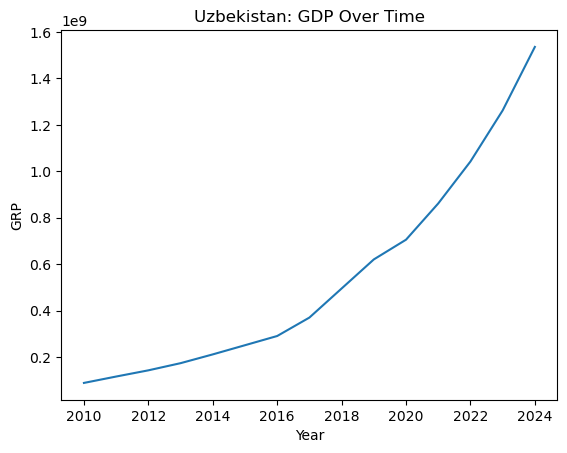

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(national_df["year"], national_df["grp"])
plt.title("Uzbekistan: GDP Over Time")
plt.xlabel("Year")
plt.ylabel("GRP")
plt.show()


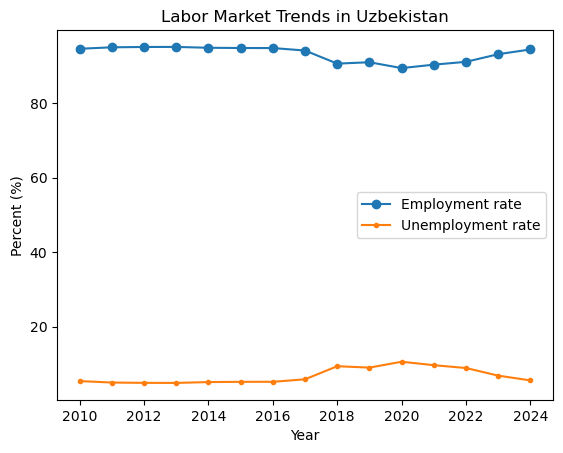

In [20]:
plt.figure()
plt.plot(national_df["year"], national_df["employment_rate_pct"], label="Employment rate", marker="o")
plt.plot(national_df["year"], national_df["unemployment_rate_pct"], label="Unemployment rate", marker=".")
plt.title("Labor Market Trends in Uzbekistan")
plt.xlabel("Year")
plt.ylabel("Percent (%)")
plt.legend()
plt.show()


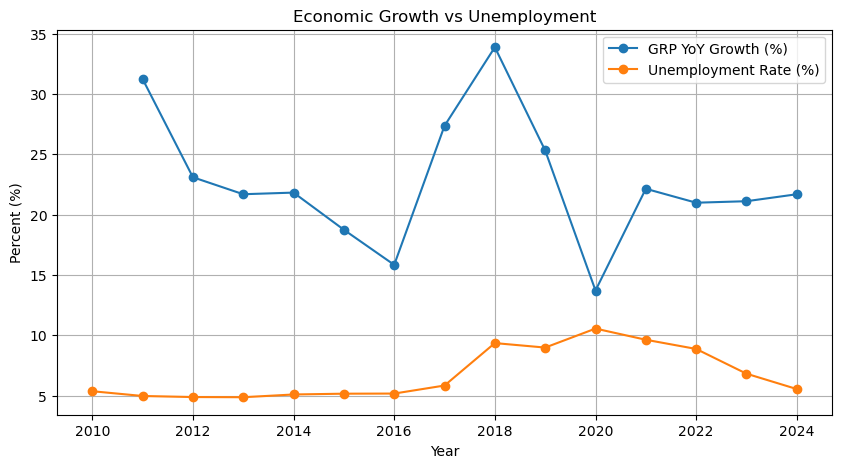

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    national_df["year"],
    national_df["grp_yoy_growth_pct"],
    marker="o",
    label="GRP YoY Growth (%)"
)
plt.plot(
    national_df["year"],
    national_df["unemployment_rate_pct"],
    marker="o",
    label="Unemployment Rate (%)"
)

plt.xlabel("Year")
plt.ylabel("Percent (%)")
plt.title("Economic Growth vs Unemployment")
plt.legend()
plt.grid(True)
plt.show()


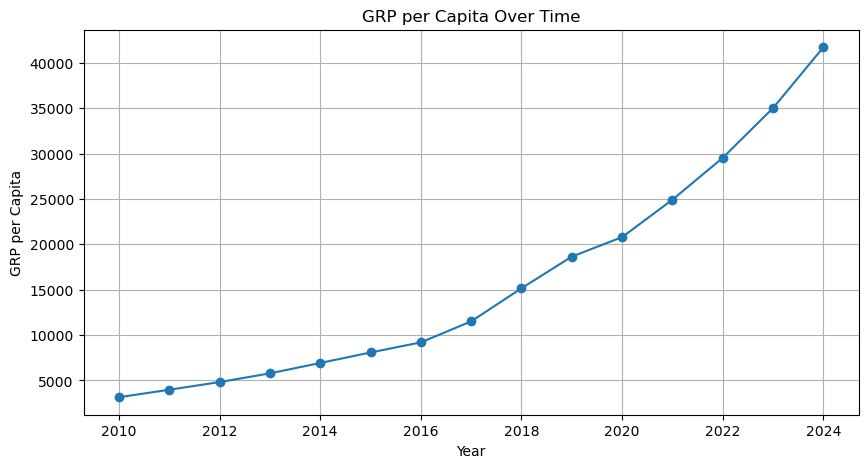

In [22]:
plt.figure(figsize=(10,5))
plt.plot(
    national_df["year"],
    national_df["grp_pc"],
    marker="o"
)

plt.xlabel("Year")
plt.ylabel("GRP per Capita")
plt.title("GRP per Capita Over Time")
plt.grid(True)
plt.show()


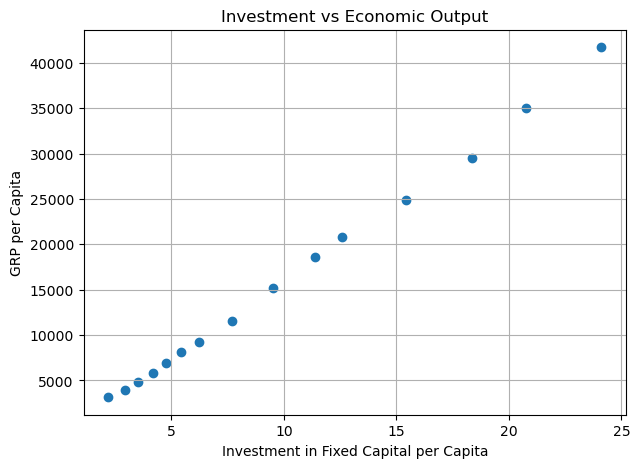

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(
    national_df["inv_fixed_capital_pc"],
    national_df["grp_pc"]
)

plt.xlabel("Investment in Fixed Capital per Capita")
plt.ylabel("GRP per Capita")
plt.title("Investment vs Economic Output")
plt.grid(True)
plt.show()


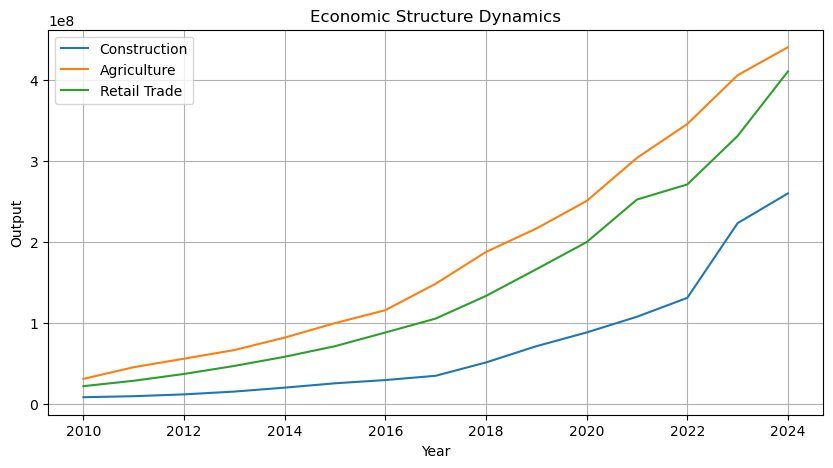

In [24]:
plt.figure(figsize=(10,5))
plt.plot(national_df["year"], national_df["construction"], label="Construction")
plt.plot(national_df["year"], national_df["agriculture_output"], label="Agriculture")
plt.plot(national_df["year"], national_df["retail_trade"], label="Retail Trade")

plt.xlabel("Year")
plt.ylabel("Output")
plt.title("Economic Structure Dynamics")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
compare_df = national_df[national_df["year"].isin([2010, 2024])]

plt.figure(figsize=(8,5))
plt.bar(
    compare_df["year"].astype(str),
    compare_df["grp_pc"]
)

plt.xlabel("Year")
plt.ylabel("GRP per Capita")
plt.title("GRP per Capita: 2010 vs 2024")
plt.grid(axis="y")
plt.show()


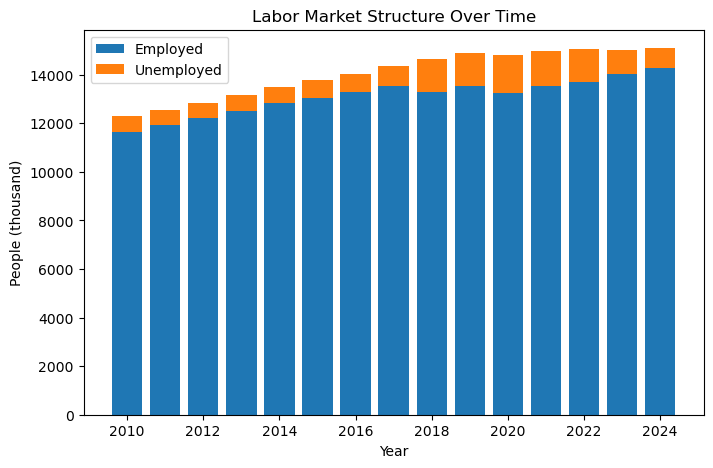

In [26]:
plt.figure(figsize=(8,5))
plt.bar(
    national_df["year"],
    national_df["employed_thousand"],
    label="Employed"
)
plt.bar(
    national_df["year"],
    national_df["unemployed_thousand"],
    bottom=national_df["employed_thousand"],
    label="Unemployed"
)

plt.xlabel("Year")
plt.ylabel("People (thousand)")
plt.title("Labor Market Structure Over Time")
plt.legend()
plt.show()


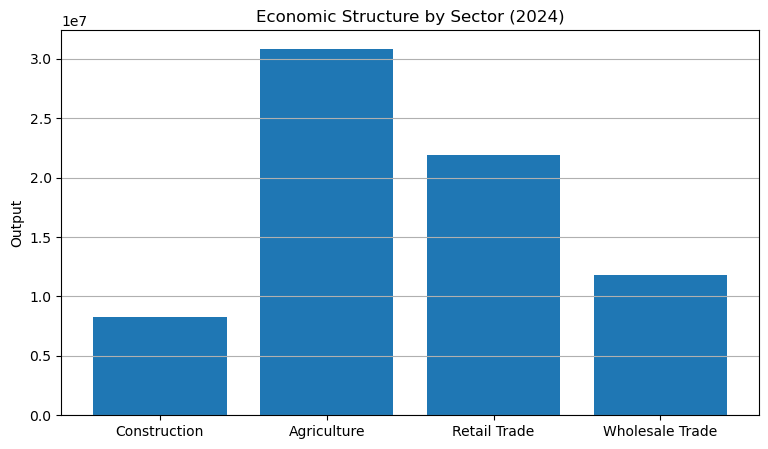

In [29]:
latest_year = national_df["year"].max()
sector_metrics = {
    "Construction": national_df["construction"].values[0],
    "Agriculture": national_df["agriculture_output"].values[0],
    "Retail Trade": national_df["retail_trade"].values[0],
    "Wholesale Trade": national_df["wholesale_trade"].values[0]
}

plt.figure(figsize=(9,5))
plt.bar(sector_metrics.keys(), sector_metrics.values())

plt.title(f"Economic Structure by Sector ({latest_year})")
plt.ylabel("Output")
plt.grid(axis="y")
plt.show()


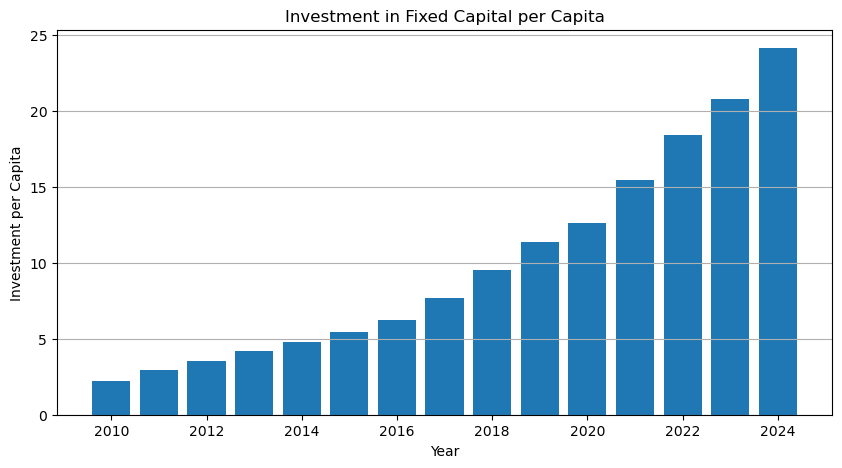

In [28]:
plt.figure(figsize=(10,5))
plt.bar(
    national_df["year"],
    national_df["inv_fixed_capital_pc"]
)

plt.xlabel("Year")
plt.ylabel("Investment per Capita")
plt.title("Investment in Fixed Capital per Capita")
plt.grid(axis="y")
plt.show()


In [30]:
regional_df["unemployment_rate_pct"] = (
    regional_df["unemployed_thousand"] /
    regional_df["econ_active_thousand"]
)*100
regional_df["employment_rate_pct"] = (
    regional_df["employed_thousand"]
    / regional_df["econ_active_thousand"] * 100
)
regional_df.columns

Index(['year', 'region', 'income_pc', 'labor_resources_thousand',
       'econ_active_thousand', 'employed_thousand', 'unemployed_thousand',
       'grp', 'inv_fixed_capital_pc', 'construction', 'foreign_trade_turnover',
       'wholesale_trade', 'retail_trade', 'population_permanent',
       'air_pollutants_emitted(1000_t)', 'agriculture_output', 'fact_deaths',
       'births_total', 'active_enterprises_count', 'grp_pc',
       'unemployment_rate_pct', 'employment_rate_pct'],
      dtype='object')

In [32]:
latest_regional_df = regional_df.sort_values(
    by="grp_pc",
    ascending=False
)

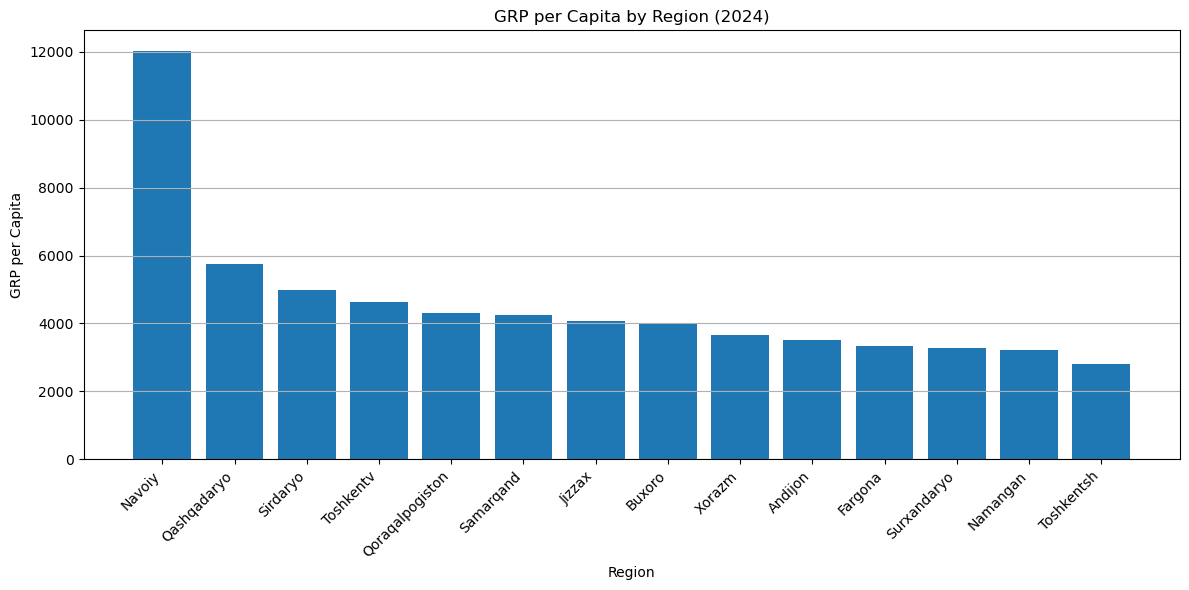

In [33]:
plt.figure(figsize=(12,6))
plt.bar(
    latest_regional_df["region"],
    latest_regional_df["grp_pc"]
)

plt.title(f"GRP per Capita by Region ({latest_year})")
plt.xlabel("Region")
plt.ylabel("GRP per Capita")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")

plt.tight_layout()
plt.show()